In [50]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk


In [51]:
#  0 stands for NOT depressed and 1 stands for Depressed
Twitter_df= pd.read_csv("sentiment_tweets.csv")
Twitter_df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [52]:
Twitter_df.shape

(10314, 3)

In [53]:
Twitter_df.isnull().sum()


Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [54]:
Twitter_df['message to examine'] = Twitter_df['message to examine'].str.lower()
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [56]:
# Remove URLs from a sample string
def remove_URL(text):
        return re.sub(r'http\S+', "", text)
    
Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_URL(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [57]:
Twitter_df.loc[(Twitter_df!=0).any(1)]
# len(Twitter_df)
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [59]:
#remove twitter mentions
def remove_mentions(text):
  return re.sub(r'@\w+', '', text)

Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_mentions(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,-,0
3,288,need to send 'em to my accountant tomorrow. o...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [60]:
#remove punctuation
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_punctuation(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,,0
3,288,need to send em to my accountant tomorrow odd...,0
4,540,add me on myspace myspacecomlookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression everyon...,1


In [61]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aashitarakesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_stopwords(x))
Twitter_df.tail()

,Index,message to examine,label (depression result)
10309,802309,depression g herbo mood im done stressing peop...,1
10310,802310,depression succumbs brain makes feel like youl...,1
10311,802311,ketamine nasal spray shows promise depression ...,1
10312,802312,dont mistake bad day depression everyone em,1
10313,802313,0,1


In [63]:
#remove Numbers
def remove_punctuation(text):
  return re.sub(r'[0-9]+', '', text)

# Twitter_df['message to examine'] = Twitter_df['message to examine'].str.replace('\d+', '')
Twitter_df.rename(columns = {'message to examine':'Tweets','label (depression result)':'Label'}, inplace = True)
Twitter_df

,Index,Tweets,Label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,,0
3,288,need send em accountant tomorrow oddly wasnt e...,0
4,540,add myspace myspacecomlookthunder,0
...,...,...,...
10309,802309,depression g herbo mood im done stressing peop...,1
10310,802310,depression succumbs brain makes feel like youl...,1
10311,802311,ketamine nasal spray shows promise depression ...,1
10312,802312,dont mistake bad day depression everyone em,1


In [16]:
# Twitter_df = Twitter_df.dropna()
# len(Twitter_df)

In [64]:

Twitter_df.to_csv("twitter_clean.csv", index=False)

In [65]:
tweets = Twitter_df['Tweets'].tolist()
len(tweets)

10314

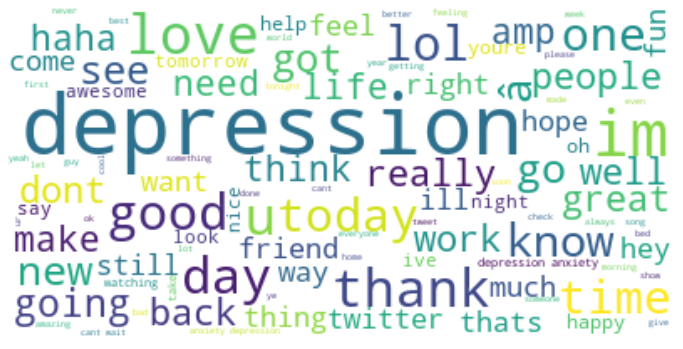

In [66]:
# Combining all the tweets

combined_tweets = " ".join(tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("sentiment.png")

In [67]:
positive_tweets = Twitter_df[Twitter_df['Label'] == 0]
positive_message= positive_tweets['Tweets'].tolist()
combined_positive_tweets = " ".join(positive_message)

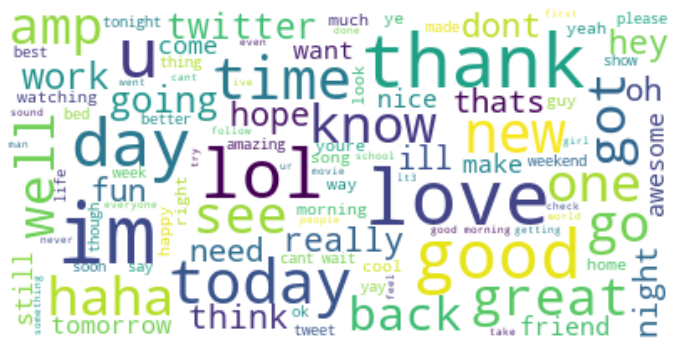

In [68]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_positive_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("positive.png")

In [69]:
negative_tweets = Twitter_df[Twitter_df['Label'] == 1]
negative_message= negative_tweets ['Tweets'].tolist()
combined_negative_tweets = " ".join(negative_message)

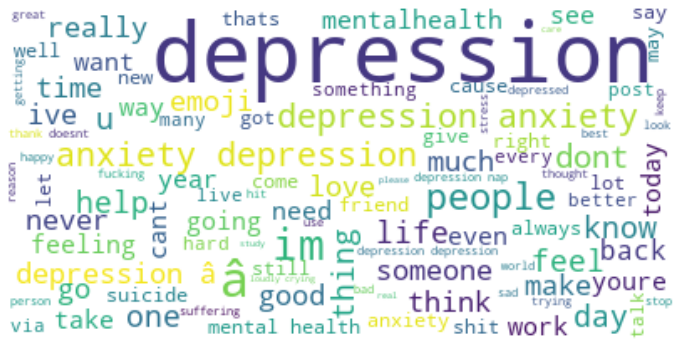

In [70]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_negative_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("negative.png")

In [71]:

Twitter_df['tokenized_tweets'] = Twitter_df.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)
Twitter_df


,Index,Tweets,Label,tokenized_tweets
0,106,real good moment missssssssss much,0,"[real, good, moment, missssssssss, much]"
1,217,reading manga,0,"[reading, manga]"
2,220,,0,[]
3,288,need send em accountant tomorrow oddly wasnt e...,0,"[need, send, em, accountant, tomorrow, oddly, ..."
4,540,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"
...,...,...,...,...
10309,802309,depression g herbo mood im done stressing peop...,1,"[depression, g, herbo, mood, im, done, stressi..."
10310,802310,depression succumbs brain makes feel like youl...,1,"[depression, succumbs, brain, makes, feel, lik..."
10311,802311,ketamine nasal spray shows promise depression ...,1,"[ketamine, nasal, spray, shows, promise, depre..."
10312,802312,dont mistake bad day depression everyone em,1,"[dont, mistake, bad, day, depression, everyone..."


In [72]:
# X= Twitter_df.tokenized_tweets
# y=Twitter_df.Label
# X

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Twitter_df['Tweets'])
y=Twitter_df.Label


In [87]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)

In [88]:
X_train[0]

<1x17313 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [90]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9962598697880592
Testing Data Score: 0.9890145395799677


ValueError: 'c' argument has 10314 elements, which is inconsistent with 'x' and 'y' with size 1.

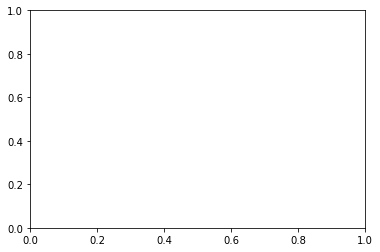

In [91]:
# Generate a new data point (the red circle)
# import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [92]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

ValueError: X has 2 features per sample; expecting 17313

In [93]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
7658,0,0
1545,0,0
4313,0,0
2726,0,0
1594,0,0
...,...,...
3500,0,0
279,0,0
4715,0,0
2809,0,0


In [94]:
Twitter_df['tokenized_tweets'] = Twitter_df.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)
Twitter_df



,Index,Tweets,Label,tokenized_tweets
0,106,real good moment missssssssss much,0,"[real, good, moment, missssssssss, much]"
1,217,reading manga,0,"[reading, manga]"
2,220,,0,[]
3,288,need send em accountant tomorrow oddly wasnt e...,0,"[need, send, em, accountant, tomorrow, oddly, ..."
4,540,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"
...,...,...,...,...
10309,802309,depression g herbo mood im done stressing peop...,1,"[depression, g, herbo, mood, im, done, stressi..."
10310,802310,depression succumbs brain makes feel like youl...,1,"[depression, succumbs, brain, makes, feel, lik..."
10311,802311,ketamine nasal spray shows promise depression ...,1,"[ketamine, nasal, spray, shows, promise, depre..."
10312,802312,dont mistake bad day depression everyone em,1,"[dont, mistake, bad, day, depression, everyone..."


In [85]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

## Data Preprocessing

In [95]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_scaler' is not defined

In [96]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Defining our Model Architecture (the layers)

In [97]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [98]:
from tensorflow.keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [41]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

## Model Summary

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [100]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [82]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

NameError: name 'X_train_scaled' is not defined

## Quantifying the Model

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Making Predictions with new data

In [ ]:
import numpy as np
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")